In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
path=r'C:\Users\Tushar Bailwal\Downloads\archive\2nd_test\2nd_test'

In [3]:
filename = '2004.02.19.02.02.39'
dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

In [4]:
dataset

,0,1,2,3
0,0.142,-0.088,0.105,-0.005
1,0.295,-0.154,0.085,0.178
2,0.120,0.200,-0.129,0.068
3,0.017,0.244,-0.266,0.022
4,0.215,-0.173,0.068,-0.105
...,...,...,...,...
20475,0.215,-0.029,-0.027,0.020
20476,0.061,-0.127,-0.022,-0.076
20477,-0.188,-0.056,-0.190,-0.188
20478,0.120,-0.132,0.146,-0.083


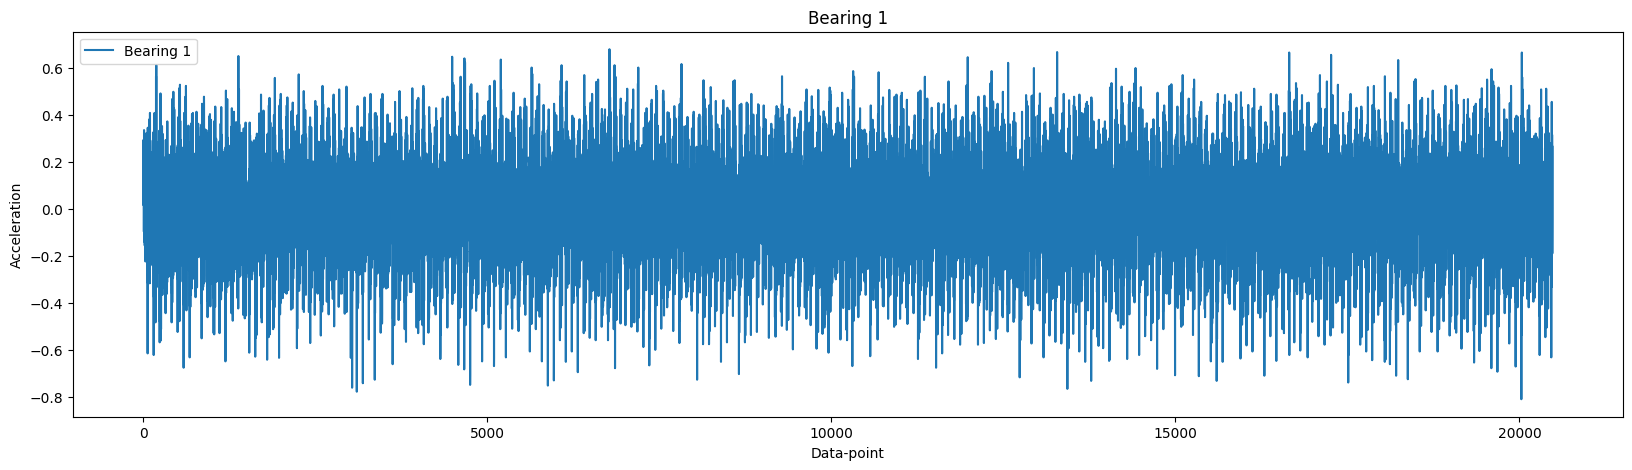

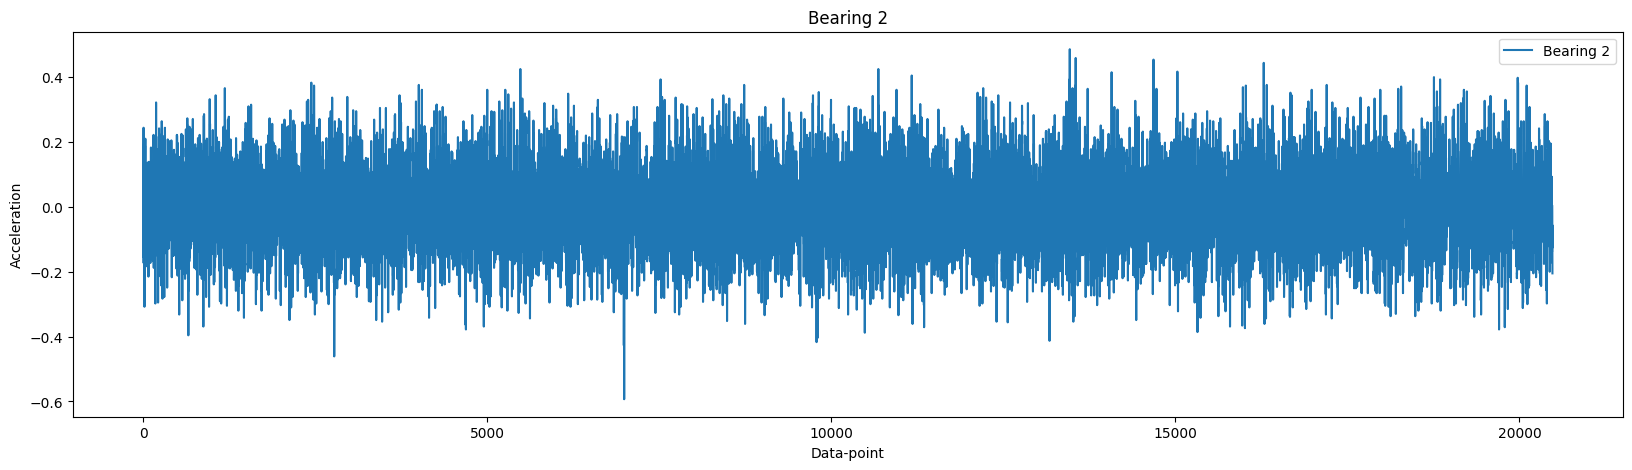

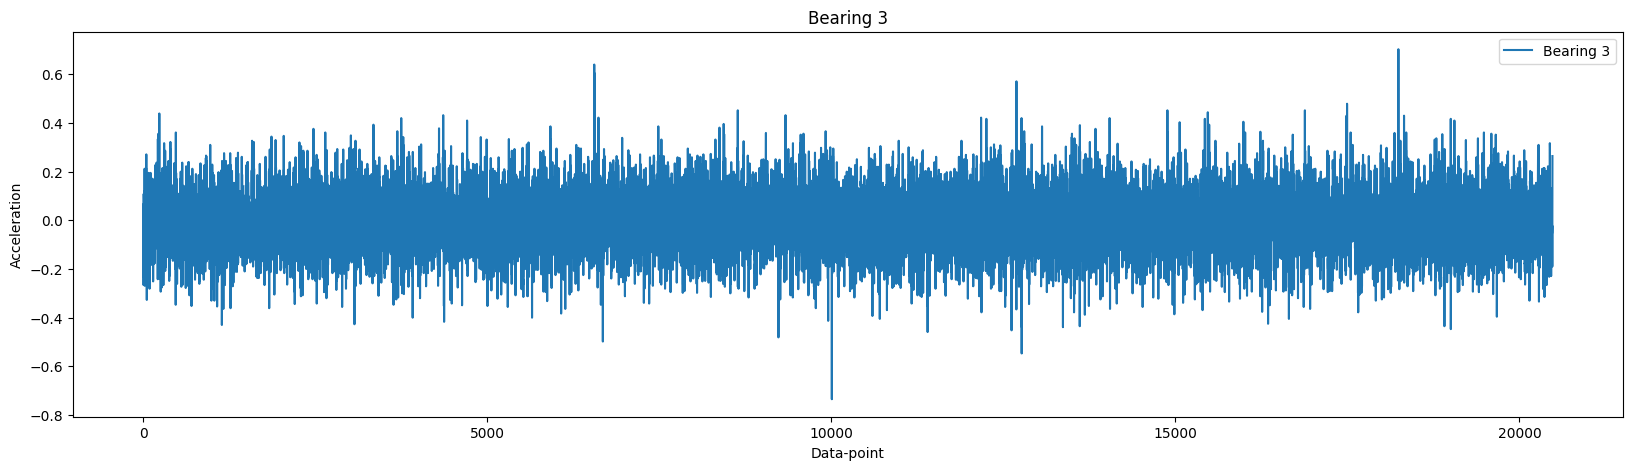

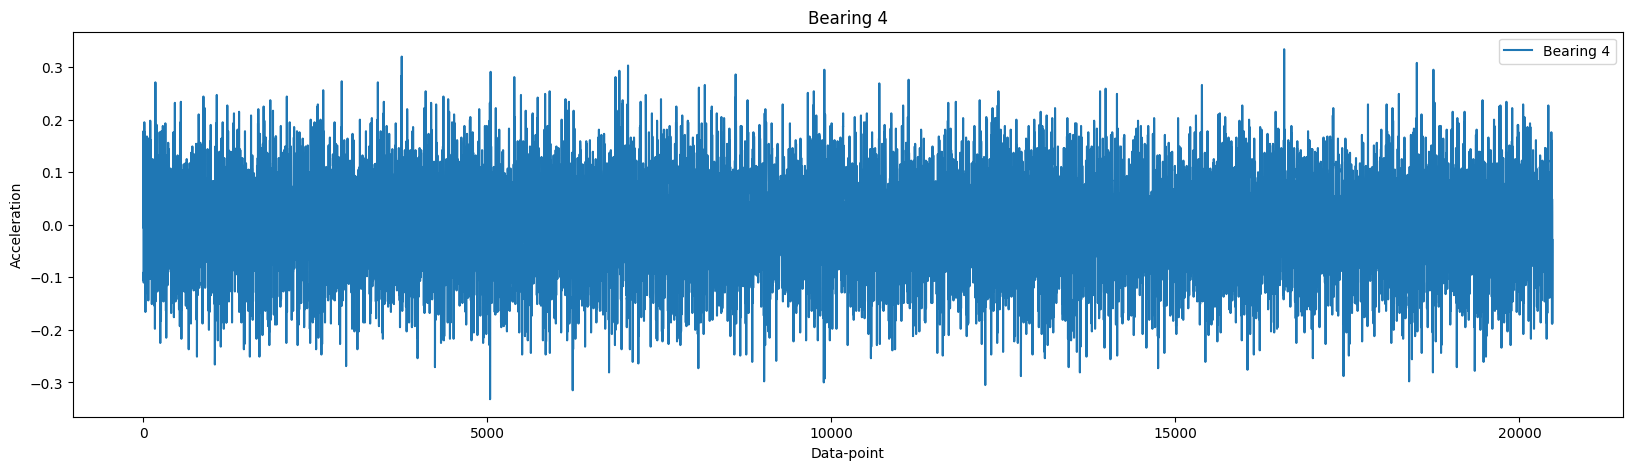

In [5]:
for i in [0,1,2,3]:
    
    df_bearing=np.array(dataset.iloc[:,i])
    
    plt.figure(figsize=(20, 5))
    plt.plot(df_bearing)

    plt.legend(['Bearing {}'.format(i+1)])

    plt.xlabel("Data-point")
    plt.ylabel("Acceleration")
    plt.title('Bearing {}'.format(i+1))
    plt.show()

In [6]:
bearing_no=1

bearing_data = np.array(dataset.iloc[:,bearing_no-1])

bearing_data

array([ 0.142,  0.295,  0.12 , ..., -0.188,  0.12 ,  0.266],
      shape=(20480,))

In [7]:
temp = bearing_data
temp

array([ 0.142,  0.295,  0.12 , ..., -0.188,  0.12 ,  0.266],
      shape=(20480,))

In [8]:
# extracting features from this bearing data

feature_matrix=np.zeros((1,9))
feature_matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
def compute_skewness(x):
    
    n = len(x)
    third_moment = np.sum((x - np.mean(x))**3) / n
    s_3 = np.std(x, ddof = 1) ** 3
    return third_moment/s_3

In [10]:
def compute_kurtosis(x):
    
    n = len(x)
    fourth_moment = np.sum((x - np.mean(x))**4) / n
    s_4 = np.std(x, ddof = 1) ** 4
    return fourth_moment / s_4 - 3

In [11]:
feature_matrix[0,0] = np.max(temp)
feature_matrix[0,1] = np.min(temp)
feature_matrix[0,2] = np.mean(temp)
feature_matrix[0,3] = np.std(temp, ddof = 1)
feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
feature_matrix[0,5] = compute_skewness(temp)
feature_matrix[0,6] = compute_kurtosis(temp)
feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]

In [12]:
feature_matrix

array([[ 6.81000000e-01, -8.08000000e-01, -2.59384766e-03,
         2.07209990e-01,  2.07221166e-01, -1.60982270e-01,
         1.68435175e-01,  3.28634383e+00, -7.98894898e+01]])

In [13]:
df = pd.DataFrame(feature_matrix)
df.index=[filename]
df

,0,1,2,3,4,5,6,7,8
2004.02.19.02.02.39,0.681,-0.808,-0.002594,0.20721,0.207221,-0.160982,0.168435,3.286344,-79.88949


In [14]:
Time_feature_matrix=pd.DataFrame()

test_set=1

bearing_no=1 # Provide the Bearing number [1,2,3,4] of the Test set

path=r'C:\Users\Tushar Bailwal\Downloads\archive\1st_test\1st_test'
for filename in os.listdir(path):
    
    dataset=pd.read_csv(os.path.join(path, filename), sep='\t',header=None)

    bearing_data = np.array(dataset.iloc[:,bearing_no-1])

    feature_matrix=np.zeros((1,9))
    temp = bearing_data
    feature_matrix[0,0] = np.max(temp)
    feature_matrix[0,1] = np.min(temp)
    feature_matrix[0,2] = np.mean(temp)
    feature_matrix[0,3] = np.std(temp, ddof = 1)
    feature_matrix[0,4] = np.sqrt(np.mean(temp ** 2))
    feature_matrix[0,5] = compute_skewness(temp)
    feature_matrix[0,6] = compute_kurtosis(temp)
    feature_matrix[0,7] = feature_matrix[0,0]/feature_matrix[0,4]
    feature_matrix[0,8] = feature_matrix[0,4]/feature_matrix[0,2]
    
    df = pd.DataFrame(feature_matrix)
    df.index=[filename[:-3]]
    
    Time_feature_matrix = pd.concat([Time_feature_matrix, df])
    

In [15]:
Time_feature_matrix

,0,1,2,3,4,5,6,7,8
2003.10.22.12.06,0.388,-0.720,-0.094593,0.081124,0.124614,-0.029991,1.068765,3.113619,-1.317370
2003.10.22.12.09,0.388,-0.654,-0.094903,0.079517,0.123811,-0.070070,1.161145,3.133804,-1.304613
2003.10.22.12.14,0.317,-0.623,-0.096187,0.080219,0.125246,-0.041643,0.985896,2.531011,-1.302116
2003.10.22.12.19,0.457,-0.598,-0.095613,0.080827,0.125197,0.005161,1.033900,3.650234,-1.309422
2003.10.22.12.24,0.388,-0.623,-0.095133,0.082036,0.125618,-0.060191,1.109762,3.088726,-1.320447
...,...,...,...,...,...,...,...,...,...
2003.11.25.16.07,0.476,-0.669,-0.117540,0.120931,0.168639,0.000653,0.476461,2.822593,-1.434745
2003.11.25.23.13,0.513,-0.803,-0.117403,0.129745,0.174975,-0.052188,0.554562,2.931849,-1.490383
2003.11.25.23.19,0.449,-0.710,-0.118305,0.128373,0.174571,-0.080797,0.382898,2.572023,-1.475599
2003.11.25.23.29,0.522,-0.776,-0.118272,0.126904,0.173471,-0.009058,0.514649,3.009143,-1.466712


In [16]:
Time_feature_matrix.columns = ['Max','Min','Mean','Std','RMS','Skewness','Kurtosis','Crest Factor','Form Factor']
Time_feature_matrix.index = pd.to_datetime(Time_feature_matrix.index, format='%Y.%m.%d.%H.%M')

Time_feature_matrix = Time_feature_matrix.sort_index()

Time_feature_matrix.to_csv('Time_feature_matrix_Bearing_{}_Test_{}.csv'.format(bearing_no,test_set))

Time_feature_matrix

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor
2003-10-22 12:06:00,0.388,-0.720,-0.094593,0.081124,0.124614,-0.029991,1.068765,3.113619,-1.317370
2003-10-22 12:09:00,0.388,-0.654,-0.094903,0.079517,0.123811,-0.070070,1.161145,3.133804,-1.304613
2003-10-22 12:14:00,0.317,-0.623,-0.096187,0.080219,0.125246,-0.041643,0.985896,2.531011,-1.302116
2003-10-22 12:19:00,0.457,-0.598,-0.095613,0.080827,0.125197,0.005161,1.033900,3.650234,-1.309422
2003-10-22 12:24:00,0.388,-0.623,-0.095133,0.082036,0.125618,-0.060191,1.109762,3.088726,-1.320447
...,...,...,...,...,...,...,...,...,...
2003-11-25 16:07:00,0.476,-0.669,-0.117540,0.120931,0.168639,0.000653,0.476461,2.822593,-1.434745
2003-11-25 23:13:00,0.513,-0.803,-0.117403,0.129745,0.174975,-0.052188,0.554562,2.931849,-1.490383
2003-11-25 23:19:00,0.449,-0.710,-0.118305,0.128373,0.174571,-0.080797,0.382898,2.572023,-1.475599
2003-11-25 23:29:00,0.522,-0.776,-0.118272,0.126904,0.173471,-0.009058,0.514649,3.009143,-1.466712
